In [1]:
# %load_ext autoreload
# %autoreload 2

# Set Trial Name

In [2]:
TRIAL_NAME = "20_add_gotosan2_feature"

import datetime
import pytz
NOW = datetime.datetime.now(pytz.timezone('Asia/Tokyo')).strftime('%Y%m%d%H%M%S')

# Load yaml

In [3]:
import yaml
CONFIG_DIR = '../config'
with open(f'{CONFIG_DIR}/run000.yml') as file:
    cfg = yaml.safe_load(file)

import sys
sys.path.append(cfg['SRC_DIR'])
cfg['run_name'] = TRIAL_NAME

# fix seed

In [4]:
from util import seed_everything
seed_everything(seed=33, use_torch=False)

# Make Output Folder

In [5]:
import os
OUTPUT_DIR = f'../../output/{NOW}_{TRIAL_NAME}'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load Model

In [6]:
import pandas as pd
import numpy as np

sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')
color = pd.read_csv('../../data/color.csv')
historical_person = pd.read_csv('../../data/historical_person.csv')
maker = pd.read_csv('../../data/maker.csv')
material = pd.read_csv('../../data/material.csv')
object_collection = pd.read_csv('../../data/object_collection.csv')
palette = pd.read_csv('../../data/palette.csv')
principal_maker_occupation = pd.read_csv('../../data/principal_maker_occupation.csv')
principal_maker = pd.read_csv('../../data/principal_maker.csv')
production_place = pd.read_csv('../../data/production_place.csv')
technique = pd.read_csv('../../data/technique.csv')
test = pd.read_csv('../../data/test.csv')
test[cfg['target']] = np.nan
train = pd.read_csv('../../data/train.csv')

In [7]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [8]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,a2aabd3cc8859f4260ad,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,NaN,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,5d6a286cc3ab64c2c043,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,NaN,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


In [9]:
palette

,ratio,color_r,color_g,color_b,object_id
0,0.013781,40,4,0,000405d9a5e3f49fc49d
1,0.040509,221,189,129,000405d9a5e3f49fc49d
2,0.036344,207,175,117,000405d9a5e3f49fc49d
3,0.033316,230,197,129,000405d9a5e3f49fc49d
4,0.039600,194,161,106,000405d9a5e3f49fc49d
...,...,...,...,...,...
527885,0.019645,158,123,65,ffff22ea12d7f99cff31
527886,0.023526,79,54,28,ffff22ea12d7f99cff31
527887,0.009999,60,37,14,ffff22ea12d7f99cff31
527888,0.052426,107,81,49,ffff22ea12d7f99cff31


In [10]:
palette[palette['object_id'] == 'ffff22ea12d7f99cff31'].shape

(22, 5)

In [11]:
palette[palette['object_id'] == '000405d9a5e3f49fc49d'].shape

(22, 5)

# del_non_overlapping_list

In [12]:
del_non_overlapping_list = [
    # 'object_id',
    'art_series_id',
    #'title',
    #'description',
    #'long_title',
    'principal_maker',
    'principal_or_first_maker',
    #'sub_title',
    'copyright_holder',
    #'more_title',
    'acquisition_method',
    # 'acquisition_date',
    # 'acquisition_credit_line',
    # 'dating_presenting_date',
    # 'dating_sorting_date',
    'dating_period',
    # 'dating_year_early',
    # 'dating_year_late'
]

from util import replace_non_overlap_val_to_missing
train, test = replace_non_overlap_val_to_missing(train,test,columns=del_non_overlapping_list)

In [13]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,other,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,missing,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,other,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [14]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,other,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,missing,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,other,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,missing,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


# Merge Data

In [15]:
group = train.groupby('principal_maker')

agg_df = pd.concat([
    group.size().rename('size'), # 著者が何回出てくるか. (value_counts と同じです)
    group['sub_title'].nunique().rename('sub_title_num'), # 著者ごとに何種類の sub_title を持っているか
    group['dating_sorting_date'].agg(['min', 'max', 'mean']), # 著者ごとに描いた年度の最小・最大・平均 (agg に配列を渡すと同時に複数やってくれます)
], axis=1)

agg_df.head()

,size,sub_title_num,min,max,mean
principal_maker,,,,,
A. Böeseken,5,5,1858.0,1873.0,1865.8
A. Lutz,1,1,1825.0,1825.0,1825.0
A. Mansuy,2,2,1860.0,1860.0,1860.0
A. Nissen,3,1,1860.0,1860.0,1860.0
A. Roussel,1,1,1905.0,1905.0,1905.0


In [16]:
train = pd.merge(train, 
         agg_df,
         on='principal_maker', 
         how='left')

test = pd.merge(test, 
         agg_df,
         on='principal_maker', 
         how='left')

In [17]:
train.columns

Index(['object_id', 'art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late', 'likes', 'size', 'sub_title_num', 'min', 'max',
       'mean'],
      dtype='object')

# Feature Enginnering

In [18]:
def create_object_feature(input_df):        
    return input_df['likes'].copy()

create_object_feature(test).head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: likes, dtype: float64

In [19]:
def create_numeric_feature(input_df):
    use_columns = [
        'dating_period',
        'dating_year_early',
        'dating_year_late'
    ]

    return input_df[use_columns].copy()

create_numeric_feature(train).head(2)

,dating_period,dating_year_early,dating_year_late
0,17,1660.0,1685.0
1,19,1900.0,1930.0


In [20]:
def create_categorical_feature(input_df):
    use_columns = [
    'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    ]

    return input_df[use_columns].copy()

create_categorical_feature(train).head(2)

,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method
0,other,Jan Hackaert,Jan Hackaert,missing,purchase
1,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase


In [21]:
def create_material_feature(input_df):    
    cross_material = pd.crosstab(material['object_id'], material['name']).reset_index()
    input_cross_material = pd.merge(input_df['object_id'], cross_material, on='object_id',how='left')
    return input_cross_material.iloc[:,1:].add_prefix('Materials_')

create_material_feature(test).head(2)

,Materials_China paper,Materials_Japanese paper (handmade paper),Materials_RC paper,Materials_acrylic paint,Materials_alloy,Materials_amalgam,Materials_asbestos,Materials_asbestos-cement,Materials_ball-point pens,Materials_baryta paper,...,Materials_textile materials,Materials_tin (metal),Materials_tin alloy,Materials_tracing paper,Materials_transparant paper,Materials_velvet (fabric weave),Materials_watercolor (paint),Materials_wax,Materials_wood (plant material),Materials_wood board
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
import datetime

def create_acquisition_feature(input_df):
    out_df = pd.DataFrame()
    
    use_columns = [
        'acquisition_date'
    ]
    
    out_df['year'] = pd.to_datetime(input_df['acquisition_date']).dt.year
    out_df['month'] = pd.to_datetime(input_df['acquisition_date']).dt.month
    out_df['dayofweek'] = pd.to_datetime(input_df['acquisition_date']).dt.dayofweek
    out_df['sum_time'] =  10**10 - pd.to_datetime(input_df['acquisition_date']).view('int') // 10**9
    
    return out_df.add_prefix('AcquisitionDate_')

create_acquisition_feature(train).head(2)

,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time
0,1808.0,1.0,4.0,15112288000
1,2000.0,1.0,5.0,9053315200


In [23]:
def create_string_length_feature(input_df):
    out_df = pd.DataFrame()

    str_columns = [
        'title', 
        'long_title',
        'sub_title',
        'more_title',
        'description',
        'principal_maker',
        'principal_or_first_maker'
    ]

    for c in str_columns:
        out_df[c] = input_df[c].str.len()

    return out_df.add_prefix('StringLength__')

create_string_length_feature(train).head(2)

,StringLength__title,StringLength__long_title,StringLength__sub_title,StringLength__more_title,StringLength__description,StringLength__principal_maker,StringLength__principal_or_first_maker
0,21,48,39.0,21.0,NaN,12,12
1,15,64,17.0,15.0,NaN,12,12


In [24]:
def create_count_encoding_feature(input_df):
    use_columns = [
        'acquisition_method',
        'acquisition_date',
        'acquisition_credit_line',
        'art_series_id', 
        'principal_maker',
        'principal_or_first_maker',
        'description', 
        'dating_presenting_date',
        'dating_sorting_date',
        'dating_period',
        'dating_year_early',
        'dating_year_late',
        'title',
        'long_title',
        'sub_title',
        'copyright_holder',
        'more_title',
    ]

    out_df = pd.DataFrame()
    for column in use_columns:
        vc = train[column].value_counts()
        out_df[column] = input_df[column].map(vc)

    return out_df.add_prefix('CE_')

create_count_encoding_feature(train).head(2)

,CE_acquisition_method,CE_acquisition_date,CE_acquisition_credit_line,CE_art_series_id,CE_principal_maker,CE_principal_or_first_maker,CE_description,CE_dating_presenting_date,CE_dating_sorting_date,CE_dating_period,CE_dating_year_early,CE_dating_year_late,CE_title,CE_long_title,CE_sub_title,CE_copyright_holder,CE_more_title
0,4253,48.0,NaN,12026,3,3,NaN,3.0,65.0,3005,65.0,30.0,1,1,1.0,11313,1.0
1,4253,231.0,NaN,12026,180,180,NaN,77.0,321.0,5042,321.0,214.0,1,1,1.0,180,1.0


In [25]:
def create_one_hot_encoding(input_df):
    use_columns = [
        'acquisition_method',
        'principal_maker'
    ]
    out_df = pd.DataFrame()
    for column in use_columns:

        # あまり巨大な行列にならないよう, 出現回数が 20 回を下回るカテゴリは考慮しない
        vc = train[column].value_counts()
        vc = vc[vc > 20]

        # 明示的に catgories を指定して, input_df によらず列の大きさが等しくなるようにする
        cat = pd.Categorical(input_df[column], categories=vc.index)

        # このタイミングで one-hot 化
        out_i = pd.get_dummies(cat)
        # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
        out_i.columns = out_i.columns.tolist()
        out_i = out_i.add_prefix(f'{column}=')
        out_df = pd.concat([out_df, out_i], axis=1)
    return out_df

create_one_hot_encoding(train).head(2)

,acquisition_method=purchase,acquisition_method=transfer,acquisition_method=gift,acquisition_method=unknown,acquisition_method=bequest,acquisition_method=loan,acquisition_method=missing,acquisition_method=nationalization 1795,principal_maker=anonymous,principal_maker=other,...,principal_maker=C.M. Ferrier & F. von Martens,principal_maker=Rembrandt van Rijn,principal_maker=Cor Jaring,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Maurits Quinkhard,principal_maker=Jan Banning,principal_maker=Adolphe Zimmermans,principal_maker=Augusta Curiel,principal_maker=Gerard Edelinck,principal_maker=Jean Baptiste August Kessler
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import re

#  h 166mm × w 78/54mm

def get_h_from_subtitle(text:str):
    match_cm = re.search(r'h \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'h \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100

def get_w_from_subtitle(text:str):
    match_cm = re.search(r'w \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'w \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        elif match_mm.group()[2:-2] == '78/54':
            return float(78)
        else:
            return float(match_mm.group()[2:-2])/100    

def get_t_from_subtitle(text:str):
    match_cm = re.search(r't \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r't \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   

def get_d_from_subtitle(text:str):
    match_cm = re.search(r'd \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'd \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   
        
def create_subtitle_info(input_df):
    out_df = pd.DataFrame()
     
    out_df['subtitle_h'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_h_from_subtitle(x))
    out_df['subtitle_w'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_w_from_subtitle(x))
    out_df['subtitle_t'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_t_from_subtitle(x))
    out_df['subtitle_d'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_d_from_subtitle(x))
    
    out_df['area'] = out_df['subtitle_h'] * out_df['subtitle_w']
    out_df['volume'] = out_df['subtitle_h'] * out_df['subtitle_w'] * out_df['subtitle_t']

    return out_df

create_subtitle_info(test).head(2)

,subtitle_h,subtitle_w,subtitle_t,subtitle_d,area,volume
0,1.67,1.08,NaN,NaN,1.8036,NaN
1,29.70,24.10,NaN,NaN,715.7700,NaN


In [27]:
# # train_emb_npy = np.load('../../extract_data/train_word_emb.npy')
# # test_emb_npy = np.load('../../extract_data/test_word_emb.npy')

# train_emb_npy = np.load('../../extract_data/train_description_emb_multilingual.npy')
# test_emb_npy = np.load('../../extract_data/test_description_emb_multilingual.npy')

# train_emb_df = pd.concat([train['object_id'], pd.DataFrame(train_emb_npy)],axis=1)
# test_emb_df = pd.concat([test['object_id'], pd.DataFrame(test_emb_npy)],axis=1)

# all_df = pd.concat([train_emb_df,test_emb_df],axis=0).reset_index(drop=True)

# all_df.to_pickle('../../extract_data/all_description_emb_multilingual.pkl')

In [28]:
from util import use_pca

def create_description_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_description_emb_multilingual.pkl')
    
#     # 756 to 256
#     comp_num = 256

#     pca = PCA(n_components = comp_num)
#     pca_res = pca.fit_transform(all_emb_df.iloc[:,1:].values)
#     emb_df_256 = pd.DataFrame(pca_res, columns=[f'pca_{i}' for i in range(comp_num)])
#     all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('DescriptionEmb_')

create_description_emb(test).tail(2)

,DescriptionEmb_pca_0,DescriptionEmb_pca_1,DescriptionEmb_pca_2,DescriptionEmb_pca_3,DescriptionEmb_pca_4,DescriptionEmb_pca_5,DescriptionEmb_pca_6,DescriptionEmb_pca_7,DescriptionEmb_pca_8,DescriptionEmb_pca_9,...,DescriptionEmb_pca_246,DescriptionEmb_pca_247,DescriptionEmb_pca_248,DescriptionEmb_pca_249,DescriptionEmb_pca_250,DescriptionEmb_pca_251,DescriptionEmb_pca_252,DescriptionEmb_pca_253,DescriptionEmb_pca_254,DescriptionEmb_pca_255
12006,4.868668,-2.158478,0.022857,0.005380,-0.005051,-0.033197,-0.030381,0.001403,-0.000757,-0.003157,...,-0.000065,-0.000070,-0.000092,0.000011,0.000046,-0.000033,0.000201,0.000043,-0.000019,-0.000100
12007,-2.857192,-0.279424,-1.757070,-0.255253,-0.783499,-0.267255,-0.262804,-0.261662,0.870814,-0.289136,...,-0.002021,-0.026324,0.001770,-0.004371,0.023271,0.019867,0.020989,0.001674,0.005685,0.004983


In [29]:
# train_emb_npy = np.load('../../extract_data/train_word_emb.npy')
# test_emb_npy = np.load('../../extract_data/test_word_emb.npy')

# train_emb_npy = np.load('../../extract_data/train_description_emb_multilingual.npy')
# test_emb_npy = np.load('../../extract_data/test_description_emb_multilingual.npy')

train_emb_npy = np.load('../../extract_data/train_long_title_emb_multilingual.npy')
test_emb_npy = np.load('../../extract_data/test_long_title_emb_multilingual.npy')

train_emb_df = pd.concat([train['object_id'], pd.DataFrame(train_emb_npy)],axis=1)
test_emb_df = pd.concat([test['object_id'], pd.DataFrame(test_emb_npy)],axis=1)

all_df = pd.concat([train_emb_df,test_emb_df],axis=0).reset_index(drop=True)

all_df.to_pickle('../../extract_data/all_longtitle_emb_multilingual.pkl')

In [30]:
from util import use_pca

def create_longtitle_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_longtitle_emb_multilingual.pkl')
    
#     # 756 to 256
#     comp_num = 256

#     pca = PCA(n_components = comp_num)
#     pca_res = pca.fit_transform(all_emb_df.iloc[:,1:].values)
#     emb_df_256 = pd.DataFrame(pca_res, columns=[f'pca_{i}' for i in range(comp_num)])
#     all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('LongTitleEmb_')

create_longtitle_emb(train).tail(2)

,LongTitleEmb_pca_0,LongTitleEmb_pca_1,LongTitleEmb_pca_2,LongTitleEmb_pca_3,LongTitleEmb_pca_4,LongTitleEmb_pca_5,LongTitleEmb_pca_6,LongTitleEmb_pca_7,LongTitleEmb_pca_8,LongTitleEmb_pca_9,...,LongTitleEmb_pca_246,LongTitleEmb_pca_247,LongTitleEmb_pca_248,LongTitleEmb_pca_249,LongTitleEmb_pca_250,LongTitleEmb_pca_251,LongTitleEmb_pca_252,LongTitleEmb_pca_253,LongTitleEmb_pca_254,LongTitleEmb_pca_255
12024,0.134985,0.274561,-0.355268,-0.568043,0.490873,-0.759762,0.800045,0.492067,-0.684613,-0.055676,...,-0.124085,-0.109650,0.011198,0.033917,-0.071648,0.004953,0.036293,-0.151615,0.046661,0.075901
12025,3.315138,0.391916,-0.387957,-0.729398,-0.963973,-1.700651,-0.560261,0.077447,0.027761,-0.265688,...,0.011082,-0.019668,0.018901,-0.077008,-0.060058,-0.031605,0.043291,0.041119,0.057007,0.006189


In [31]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [32]:
from tqdm import tqdm

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_object_feature,
        create_numeric_feature,
        create_categorical_feature,
        create_acquisition_feature,
        # create_principal_maker_info_feature,
        create_string_length_feature,
        create_count_encoding_feature,
        create_one_hot_encoding,
        create_subtitle_info,
        create_description_emb,
        create_longtitle_emb,
        create_material_feature
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)
        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

train_feat= to_feature(train)
test_feat = to_feature(test)

train = train_feat.copy()
test = test_feat.copy()

 55%|█████▍    | 6/11 [00:00<00:00, 36.04it/s]

createcreate_object_feature  0.001[s]
createcreate_numeric_feature  0.002[s]
createcreate_categorical_feature  0.004[s]
createcreate_acquisition_feature  0.036[s]
createcreate_string_length_feature  0.032[s]
createcreate_count_encoding_feature  0.065[s]
createcreate_one_hot_encoding  0.012[s]


 73%|███████▎  | 8/11 [00:00<00:00, 26.39it/s]

createcreate_subtitle_info  0.091[s]
createcreate_description_emb  1.123[s]


 91%|█████████ | 10/11 [00:02<00:00,  2.76it/s]

createcreate_longtitle_emb  1.048[s]


 55%|█████▍    | 6/11 [00:00<00:00, 46.36it/s]

createcreate_material_feature  0.300[s]
createcreate_object_feature  0.000[s]
createcreate_numeric_feature  0.002[s]
createcreate_categorical_feature  0.001[s]
createcreate_acquisition_feature  0.014[s]
createcreate_string_length_feature  0.031[s]
createcreate_count_encoding_feature  0.061[s]


 73%|███████▎  | 8/11 [00:00<00:00, 31.33it/s]

createcreate_one_hot_encoding  0.010[s]
createcreate_subtitle_info  0.083[s]
createcreate_description_emb  1.074[s]


 91%|█████████ | 10/11 [00:02<00:00,  2.87it/s]

createcreate_longtitle_emb  1.044[s]


100%|██████████| 11/11 [00:02<00:00,  3.96it/s]

createcreate_material_feature  0.292[s]


In [33]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# train

In [34]:
train.isnull().sum()

likes                                0
dating_period                        0
dating_year_early                   10
dating_year_late                    38
art_series_id                        0
                                  ... 
Materials_velvet (fabric weave)    219
Materials_watercolor (paint)       219
Materials_wax                      219
Materials_wood (plant material)    219
Materials_wood board               219
Length: 730, dtype: int64

In [35]:
test.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,AcquisitionDate_year,...,Materials_textile materials,Materials_tin (metal),Materials_tin alloy,Materials_tracing paper,Materials_transparant paper,Materials_velvet (fabric weave),Materials_watercolor (paint),Materials_wax,Materials_wood (plant material),Materials_wood board
0,NaN,19,1850.0,1900.0,other,Bernardus Bruining,Bernardus Bruining,missing,transfer,1994.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,17,1609.0,1633.0,other,Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,missing,nationalization 1795,1798.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# reduce mem usage

In [36]:
# from util import reduce_mem_usage
# train_feat_df = reduce_mem_usage(train_feat_df)
# test_feat_df = reduce_mem_usage(test_feat_df)

# Lable Encoding

In [37]:
cat_col = train.select_dtypes('O').columns.tolist()

In [38]:
from fe import label_encode
train, test = label_encode(train, test, cat_col)

In [39]:
train.dtypes

likes                                int64
dating_period                        int64
dating_year_early                  float64
dating_year_late                   float64
art_series_id                        int64
                                    ...   
Materials_velvet (fabric weave)    float64
Materials_watercolor (paint)       float64
Materials_wax                      float64
Materials_wood (plant material)    float64
Materials_wood board               float64
Length: 730, dtype: object

# add fold

In [40]:
from fold import add_fold_bin_skf
train = add_fold_bin_skf(train, train[cfg['target']], fold_num=5, bins=[0,1,10,100,1000, 27392])

# Target Encoding

In [41]:
train['dating_period']

0        17
1        19
2        19
3        19
4        19
         ..
12021    19
12022    18
12023    18
12024    17
12025    15
Name: dating_period, Length: 12026, dtype: int64

In [42]:
target_enc_list = [
    # 'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    'dating_period'
]

from fe import target_encoding
train, test = target_encoding(train, 
                              test, 
                              target = cfg['target'], 
                              target_enc_list = target_enc_list, 
                              fold_num = cfg['fold_num']
                             )

principal_maker
principal_or_first_maker
copyright_holder
acquisition_method
dating_period


# Make Model

In [43]:
use_col = train.columns.tolist()
use_col.remove('fold')
use_col.remove(cfg['target'])

In [44]:
use_col

['dating_period',
 'dating_year_early',
 'dating_year_late',
 'art_series_id',
 'principal_maker',
 'principal_or_first_maker',
 'copyright_holder',
 'acquisition_method',
 'AcquisitionDate_year',
 'AcquisitionDate_month',
 'AcquisitionDate_dayofweek',
 'AcquisitionDate_sum_time',
 'StringLength__title',
 'StringLength__long_title',
 'StringLength__sub_title',
 'StringLength__more_title',
 'StringLength__description',
 'StringLength__principal_maker',
 'StringLength__principal_or_first_maker',
 'CE_acquisition_method',
 'CE_acquisition_date',
 'CE_acquisition_credit_line',
 'CE_art_series_id',
 'CE_principal_maker',
 'CE_principal_or_first_maker',
 'CE_description',
 'CE_dating_presenting_date',
 'CE_dating_sorting_date',
 'CE_dating_period',
 'CE_dating_year_early',
 'CE_dating_year_late',
 'CE_title',
 'CE_long_title',
 'CE_sub_title',
 'CE_copyright_holder',
 'CE_more_title',
 'acquisition_method=purchase',
 'acquisition_method=transfer',
 'acquisition_method=gift',
 'acquisition_me

In [45]:
# 学習直前でwandbにログイン、こうしないと頻繁にnotebookが落ちる
from use_wandb import use_wandb
use_wandb(params=cfg['params'], PROJECT_NAME=cfg['competition_name'], TRIAL_NAME=TRIAL_NAME)
# e99ecbcc2d9a775a09280213a06af1cf174d0fe0

wandb: Currently logged in as: sinchir0 (use `wandb login --relogin` to force relogin)


In [46]:
from fe import target_encoding
from lgbm import LGBM

lgbm = LGBM(train=train,
  test=test,
  target='likes',
  use_col=use_col,
  cat_col=cat_col,
  cfg=cfg,
  OUTPUT_DIR=OUTPUT_DIR,
  DO_FIT=True,
  DO_SEED_AVE=False,
  DEBUG=False,
  is_target_log=True)

feature_importance_df, order = lgbm.feature_importance(PLOT=False)

--------------FOLDS : 0 --------------


/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18535	valid_1's rmse: 1.22052
[200]	training's rmse: 1.02397	valid_1's rmse: 1.10283
[300]	training's rmse: 0.953858	valid_1's rmse: 1.07355
[400]	training's rmse: 0.90376	valid_1's rmse: 1.06126
[500]	training's rmse: 0.861396	valid_1's rmse: 1.05327
[600]	training's rmse: 0.824544	valid_1's rmse: 1.04755
[700]	training's rmse: 0.791384	valid_1's rmse: 1.04265
[800]	training's rmse: 0.760643	valid_1's rmse: 1.03924
[900]	training's rmse: 0.732635	valid_1's rmse: 1.03568
[1000]	training's rmse: 0.706501	valid_1's rmse: 1.03337
[1100]	training's rmse: 0.68216	valid_1's rmse: 1.03126
[1200]	training's rmse: 0.659747	valid_1's rmse: 1.02956
[1300]	training's rmse: 0.638368	valid_1's rmse: 1.02744
[1400]	training's rmse: 0.617771	valid_1's rmse: 1.02589
[1500]	training's rmse: 0.598536	valid_1's rmse: 1.0249
[1600]	training's rmse: 0.58057	valid_1's rmse: 1.02355
[1700]	training's rmse: 0.563233	valid_1'

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.17913	valid_1's rmse: 1.22362
[200]	training's rmse: 1.0168	valid_1's rmse: 1.11313
[300]	training's rmse: 0.946447	valid_1's rmse: 1.0884
[400]	training's rmse: 0.896709	valid_1's rmse: 1.07716
[500]	training's rmse: 0.854713	valid_1's rmse: 1.07005
[600]	training's rmse: 0.818208	valid_1's rmse: 1.06474
[700]	training's rmse: 0.784492	valid_1's rmse: 1.06141
[800]	training's rmse: 0.753826	valid_1's rmse: 1.05833
[900]	training's rmse: 0.725881	valid_1's rmse: 1.05508
[1000]	training's rmse: 0.699647	valid_1's rmse: 1.05241
[1100]	training's rmse: 0.675177	valid_1's rmse: 1.05
[1200]	training's rmse: 0.652204	valid_1's rmse: 1.04793
[1300]	training's rmse: 0.630804	valid_1's rmse: 1.046
[1400]	training's rmse: 0.610699	valid_1's rmse: 1.04489
[1500]	training's rmse: 0.591498	valid_1's rmse: 1.0439
[1600]	training's rmse: 0.573433	valid_1's rmse: 1.04283
[1700]	training's rmse: 0.556124	valid_1's rm

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18588	valid_1's rmse: 1.21362
[200]	training's rmse: 1.02582	valid_1's rmse: 1.0996
[300]	training's rmse: 0.957132	valid_1's rmse: 1.07063
[400]	training's rmse: 0.906998	valid_1's rmse: 1.05601
[500]	training's rmse: 0.864791	valid_1's rmse: 1.04713
[600]	training's rmse: 0.82778	valid_1's rmse: 1.04179
[700]	training's rmse: 0.793755	valid_1's rmse: 1.03643
[800]	training's rmse: 0.762657	valid_1's rmse: 1.0337
[900]	training's rmse: 0.734082	valid_1's rmse: 1.03117
[1000]	training's rmse: 0.707697	valid_1's rmse: 1.02879
[1100]	training's rmse: 0.682925	valid_1's rmse: 1.02709
[1200]	training's rmse: 0.659677	valid_1's rmse: 1.02533
[1300]	training's rmse: 0.638007	valid_1's rmse: 1.02384
[1400]	training's rmse: 0.617617	valid_1's rmse: 1.0226
[1500]	training's rmse: 0.598457	valid_1's rmse: 1.02158
[1600]	training's rmse: 0.580165	valid_1's rmse: 1.0201
[1700]	training's rmse: 0.562888	valid_1's

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18028	valid_1's rmse: 1.23664
[200]	training's rmse: 1.01798	valid_1's rmse: 1.1289
[300]	training's rmse: 0.947462	valid_1's rmse: 1.10135
[400]	training's rmse: 0.89743	valid_1's rmse: 1.08782
[500]	training's rmse: 0.855473	valid_1's rmse: 1.07933
[600]	training's rmse: 0.818235	valid_1's rmse: 1.07309
[700]	training's rmse: 0.784668	valid_1's rmse: 1.06717
[800]	training's rmse: 0.753878	valid_1's rmse: 1.06225
[900]	training's rmse: 0.725633	valid_1's rmse: 1.05862
[1000]	training's rmse: 0.699193	valid_1's rmse: 1.05521
[1100]	training's rmse: 0.674739	valid_1's rmse: 1.05192
[1200]	training's rmse: 0.651944	valid_1's rmse: 1.04932
[1300]	training's rmse: 0.63062	valid_1's rmse: 1.04742
[1400]	training's rmse: 0.610552	valid_1's rmse: 1.04533
[1500]	training's rmse: 0.59162	valid_1's rmse: 1.04414
[1600]	training's rmse: 0.573352	valid_1's rmse: 1.04278
[1700]	training's rmse: 0.55593	valid_1's

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'principal_maker', 'principal_or_first_maker']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters fr

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.18381	valid_1's rmse: 1.22918
[200]	training's rmse: 1.02331	valid_1's rmse: 1.10854
[300]	training's rmse: 0.953522	valid_1's rmse: 1.07845
[400]	training's rmse: 0.903601	valid_1's rmse: 1.06351
[500]	training's rmse: 0.86103	valid_1's rmse: 1.05389
[600]	training's rmse: 0.823413	valid_1's rmse: 1.04728
[700]	training's rmse: 0.789443	valid_1's rmse: 1.04213
[800]	training's rmse: 0.758504	valid_1's rmse: 1.03769
[900]	training's rmse: 0.729814	valid_1's rmse: 1.0343
[1000]	training's rmse: 0.703508	valid_1's rmse: 1.03185
[1100]	training's rmse: 0.67859	valid_1's rmse: 1.02988
[1200]	training's rmse: 0.655556	valid_1's rmse: 1.02755
[1300]	training's rmse: 0.634058	valid_1's rmse: 1.02574
[1400]	training's rmse: 0.61375	valid_1's rmse: 1.02434
[1500]	training's rmse: 0.594501	valid_1's rmse: 1.02336
[1600]	training's rmse: 0.576316	valid_1's rmse: 1.02234
[1700]	training's rmse: 0.559128	valid_1'

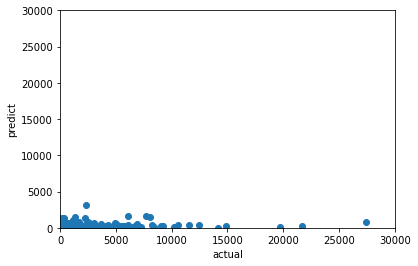

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(train['likes'],lgbm.oof);
plt.xlim(0,30000);
plt.ylim(0,30000);
plt.xlabel('actual');
plt.ylabel('predict');

In [48]:
os.makedirs(f"{OUTPUT_DIR}/imp", exist_ok=True)
feature_importance_df[order[:50]].to_csv(f"{OUTPUT_DIR}/imp/importance.csv")
display(feature_importance_df[order[:50]])

,Materials_oil paint (paint),subtitle_h,principal_maker,principal_or_first_maker,principal_or_first_maker_target_enc,area,principal_maker_target_enc,subtitle_w,StringLength__more_title,CE_acquisition_date,...,CE_sub_title,LongTitleEmb_pca_168,StringLength__description,LongTitleEmb_pca_216,DescriptionEmb_pca_3,StringLength__title,LongTitleEmb_pca_12,DescriptionEmb_pca_19,CE_description,LongTitleEmb_pca_116
fold_0,377317.961907,101822.386206,35951.170514,20803.975394,25716.128637,14163.050445,22018.925991,41074.504423,5895.852798,5986.008785,...,3022.596627,1698.177081,1630.185402,1376.477419,2243.793731,2100.325733,2099.116492,1508.447977,1224.919084,2163.532984
fold_1,380224.551186,112729.569895,30087.440415,25009.823979,26900.906188,17713.172944,22335.126080,22539.186722,8108.348176,8365.747850,...,1832.198198,1371.229622,2405.875073,1233.341400,2485.173497,1700.668834,2932.843156,1785.291306,2496.900401,2070.133271
fold_2,378738.455624,114666.221848,30599.951745,26361.008533,25250.821543,14888.629224,22637.123800,27400.973979,7414.229916,7948.323148,...,1926.965736,911.339489,1911.236664,1671.287727,3221.691180,1771.751185,2447.313691,855.669630,4925.376081,2306.415229
fold_3,397555.189285,107612.427975,34127.166371,26595.200419,23275.567490,8585.816134,20131.999082,26490.836104,6477.915931,8978.121623,...,1969.099771,1112.483028,1681.705373,1634.331941,2297.411125,1514.748550,1378.028264,1545.085029,2732.627883,1794.749561
fold_4,371076.197826,126948.220855,31286.759619,27155.603591,23843.017164,19416.639742,18998.313524,14586.817981,7823.247147,6902.472696,...,1940.096202,1937.643642,1876.409513,1839.110397,1791.777386,1777.359864,1773.430978,1751.111446,1694.079178,1681.767851


In [49]:
from make_data import make_oof
oof_df = make_oof(OUTPUT_DIR=OUTPUT_DIR, TARGET=cfg['target'])

In [50]:
# from score import calc_macro_auc
# score = calc_macro_auc(train_target_df=train_target_df, oof_df=oof_df, order_list=TARGET_IDS)

In [51]:
sample_sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')

In [52]:
from make_data import make_sub
sub_df = make_sub(sample_sub=sample_sub, TARGET_NAME=cfg['target'], TRIAL_NAME=TRIAL_NAME, OUTPUT_DIR=OUTPUT_DIR, cv_score=lgbm.score)

QUick Sub
sh sub.sh output/20210308224550_20_add_gotosan2_feature/pred/pred_likes_1.0249.csv


In [53]:
sub_df.describe()

,likes
count,12008.000000
mean,21.743073
std,64.795298
min,0.000000
25%,1.154677
50%,2.614251
75%,6.499496
max,1736.283738


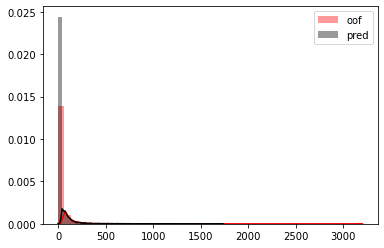

In [54]:
from make_fig import make_dist_oof_pred
make_dist_oof_pred(oof_df=oof_df,sub_df=sub_df,OUTPUT_DIR=OUTPUT_DIR)